# 14. DFS와 BFS
[문제 링크](https://www.acmicpc.net/problem/1260)

In [13]:
from collections import deque

def bfs(start):
    # 큐 생성
    qu = deque()
    # 시작 노드를 큐에 넣고 방문 표시
    qu.append(start)
    bfs_visits[start] = True
    # 큐가 빌 때까지 반복
    while qu:
        # 큐에서 노드를 하나 꺼내고 출력
        c_node = qu.popleft()
        print(c_node, end=' ')
        # 해당 노드와 연결된 노드 중 방문하지 않은 노드를 큐에 넣고 방문 표시
        for n_node in nodes[c_node]:
            if bfs_visits[n_node]:
                continue
            qu.append(n_node)
            bfs_visits[n_node] = True

def dfs(start):
    # 스택 생성
    stack = []
    # 시작 노드를 스택에 넣기
    stack.append(start)
    # 스택이 빌 때까지 반복
    while stack:
        # 스택에서 노드를 하나 꺼냄
        c_node = stack.pop()
        # 방문한 노드라면 다음 노드로 넘어감
        if dfs_visits[c_node]:
            continue
        # 방문하지 않은 노드라면 방문 표시, 출력
        dfs_visits[c_node] = True
        print(c_node, end=' ')
        # 작은수부터 스택에 넣기위한 임시 스택
        temp_stack = []
        # 해당 노드와 연결된 노드 중 방문하지 않은 노드를 임시 스택에 넣고 방문 표시
        # 임시스택에 작은수부터 들어감
        for n_node in nodes[c_node]:
            if dfs_visits[n_node]:
                continue
            temp_stack.append(n_node)
        # 임시 스택에 있는 노드를 스택으로 옮김
        # 큰 수부터 스택에 들어감 -> 작은수부터 방문
        while temp_stack:
            stack.append(temp_stack.pop())

# 노드의 갯수, 간선의 갯수, 시작 노드
n, e, start = map(int, input().split())
# 노드에 연결된 노드 정보를 담는 리스트
nodes = [[] for _ in range(n+1)]
# 노드 방문 여부를 담는 리스트
dfs_visits = [False] * (n+1)
bfs_visits = [False] * (n+1)
# 노드에 간선 정보 입력
for _ in range(e):
    n1, n2 = map(int, input().split())
    nodes[n1].append(n2)
    nodes[n2].append(n1)
# 정점 번호가 작은 것을 먼저 방문해야하므로 정렬
for node in nodes:
    node.sort()
# dfs, bfs 실행
dfs(start)
print()
bfs(start)

1 2 4 3 
1 2 3 4 

## 성공
- dfs와 bfs의 차이점을 잘 보이게 하기 위해 dfs를 stack을 통해 구현.
- dfs에서 작은수를 먼저 방문하기 위해 임시스택에 넣었다가 다시 스택에 넣음.

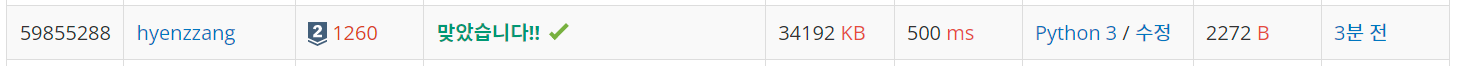

# 15. 미로 탐색
[문제 링크](https://www.acmicpc.net/problem/2178)

In [41]:
from collections import deque
from pprint import pprint

# 이동함수들 정의
# 이동 불가능하면 False, 가능하면 이동 후 좌표 반환
def go_pos_x(x, y):
    x_ = x + 1
    if x == n-1: return False
    if maze[x_][y] == '0': return False
    if maze_distances[x_][y] != -1: return False
    return x_, y
def go_nag_x(x, y):
    x_ = x - 1
    if x == 0: return False
    if maze[x_][y] == '0': return False
    if maze_distances[x_][y] != -1: return False
    return x_, y
def go_pos_y(x, y):
    y_ = y + 1
    if y == m-1: return False
    if maze[x][y_] == '0': return False
    if maze_distances[x][y_] != -1: return False
    return x, y_
def go_nag_y(x, y):
    y_ = y - 1
    if y == 0: return False
    if maze[x][y_] == '0': return False
    if maze_distances[x][y_] != -1: return False
    return x, y_

# 이동 함수들을 리스트로 묶음
go_funcs = [go_pos_x, go_nag_x, go_pos_y, go_nag_y]

n,m = map(int,input().split())
# 미로 입력
maze = []
for _ in range(n):
    maze.append(list(input()))
# 거리와 방문여부를 담는 리스트
# 미방문시 -1, 방문시 거리를 담음
maze_distances = [[-1] * m for _ in range(n)]
# 시작점 큐에 넣기, 거리 1로 초기화
qu = deque()
qu.append((0,0))
maze_distances[0][0] = 1
while qu:
    x, y = qu.popleft()
    for go in go_funcs:
        # 이동할 수 없는 경우, 다음 이동 함수로 넘어감
        if not bool(go(x,y)):
            continue
        # 이동할 수 있는 경우
        # 이동 후 거리를 1 증가
        # 좌표를 큐에 넣음
        x_, y_ = go(x,y)
        maze_distances[x_][y_] = maze_distances[x][y] + 1
        qu.append((x_, y_))
        
print(maze_distances[n-1][m-1])

4


## 성공
- 최단거리를 구하기 위해 BFS사용
- 이동함수는 전후좌우를 각각 만들고, 리스트에 넣어 사용성을 높임.

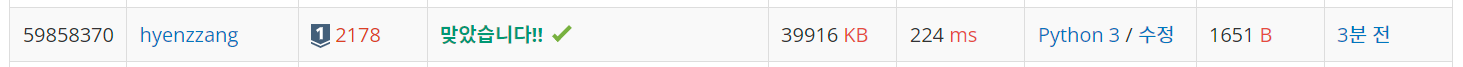